# Оценка результатов акции по Партнеру, рекомендации по механике и ее использованию в следующих активностях

<a id="начало"></a>

<div style="border:solid black 2px; padding: 20px">

Акция 3% кэшбэк на сумму от 999 рублей.

Период акции 01.12.2022-31.03.2023 г. (4 месяца).

Цель: оценить результаты акции по Партнеру, предоставить рекомендации по механике и ее использованию в следующих активностях.

Содержание работы:

1. [Загрузка данных](#загрузка)
2. [Лайфтайм](#Лайфтайм)
3. [Коэффициент удержания](#Коэффициент_удержания)
4. [Коэффициент отскока](#коэффициент_отскока)
5. [Частота транзакций](#Частота_транзакций)
6. [Средний чек](#средний)
7. [Доход с одного клиента](#доход)
8. [Оборот по месяцам](#оборот)
9. [Соотношение доходов и расходов](#Соотношение)
10. [Выводы](#Выводы)
    
</div>

[В начало](#начало)

<a id="загрузка"></a>

## Загрузка данных

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
file = 'cohort.xlsx' # сформированные когорты
file1 = 'final.xlsx'  # общие данные
cohort = pd.read_excel(file)
final = pd.read_excel(file1)

In [3]:
cohort.head()

,Месяц 1-й покупки по акции,Месяц транзакции,Количество клиентов,Количество операций,Оборот
0,2022-12-01,2022-12-01,76,88,159798.17
1,2022-12-01,2023-01-01,38,69,61380.82
2,2022-12-01,2023-02-01,30,63,63381.82
3,2022-12-01,2023-03-01,24,60,59184.73
4,2022-12-01,2023-04-01,31,49,35948.07


In [4]:
final

,Месяц транзакции,Количество уникальных клиентов-участников программы,Клиенты - участники акции в данном месяце,Количество операций по участникам программы,Транзакции в рамках акции,Сумма операций по участникам программы,Оборот в рамках акции,"Держатели карты - не участники программы, кол-во карт",Количество операций,Сумма операций
0,2022-12-01,243,76.0,88,79.0,159798.17,155296.97,NaN,NaN,NaN
1,2023-01-01,1111,331.0,688,416.0,903487.51,783119.96,78423.0,108541.0,7.179585e+07
2,2023-02-01,1141,363.0,801,463.0,1098824.29,962305.28,95180.0,133103.0,8.958793e+07
3,2023-03-01,1443,393.0,1001,502.0,1294297.42,1076526.62,116529.0,166947.0,1.085041e+08
4,2023-04-01,1284,NaN,584,NaN,542373.67,NaN,120930.0,169127.0,1.139308e+08
5,2023-05-01,1093,NaN,416,NaN,364880.71,NaN,122189.0,166559.0,1.106744e+08
6,2023-06-01,907,NaN,291,NaN,287492.29,NaN,129263.0,174102.0,1.221594e+08


[В начало](#начало)

<a id="Лайфтайм"></a>

## Лайфтайм

<div style="border:solid black 2px; padding: 20px">

Вычисляем лайфтайм для когорт от месяца первой покупки.

</div>

In [5]:
cohort['Лайфтайм'] = (cohort['Месяц транзакции'].dt.to_period('M')
                     .sub(cohort['Месяц 1-й покупки по акции'].dt.to_period('M'))
                     .apply(lambda x: x.n)
                      )
cohort.head(8)

,Месяц 1-й покупки по акции,Месяц транзакции,Количество клиентов,Количество операций,Оборот,Лайфтайм
0,2022-12-01,2022-12-01,76,88,159798.17,0
1,2022-12-01,2023-01-01,38,69,61380.82,1
2,2022-12-01,2023-02-01,30,63,63381.82,2
3,2022-12-01,2023-03-01,24,60,59184.73,3
4,2022-12-01,2023-04-01,31,49,35948.07,4
5,2022-12-01,2023-05-01,20,33,23940.52,5
6,2022-12-01,2023-06-01,15,19,18029.67,6
7,2023-01-01,2023-01-01,313,619,842106.69,0


[В начало](#начало)

<a id="Коэффициент_удержания"></a>

## Retention Rate (Коэффициент удержания)

<div style="border:solid black 2px; padding: 20px">

Строим таблицу удержания.

</div>

In [6]:
cohort['Когорта'] = pd.to_datetime(cohort['Месяц 1-й покупки по акции']).dt.date

In [7]:
retention = cohort.pivot_table(index=['Когорта'], columns='Лайфтайм', values='Количество клиентов')

cohort_sizes = (cohort.groupby('Когорта')
                      .agg({'Количество клиентов': 'first'})
                      .rename(columns={'Количество клиентов': 'Размер когорты'}))

retention = cohort_sizes.merge(retention, on='Когорта', how='left').fillna(0)
retention

,Размер когорты,0,1,2,3,4,5,6
Когорта,,,,,,,,
2022-12-01,76,76.0,38.0,30.0,24.0,31.0,20.0,15.0
2023-01-01,313,313.0,137.0,116.0,101.0,82.0,64.0,0.0
2023-02-01,266,266.0,96.0,84.0,70.0,56.0,0.0,0.0
2023-03-01,274,274.0,89.0,67.0,47.0,0.0,0.0,0.0


In [8]:
# делим данные таблицы удержания на размеры когорт

retention_share = retention.div(retention['Размер когорты'], axis=0)\
                           .drop(columns=['Размер когорты']).round(2)
retention_share

,0,1,2,3,4,5,6
Когорта,,,,,,,
2022-12-01,1.0,0.50,0.39,0.32,0.41,0.26,0.2
2023-01-01,1.0,0.44,0.37,0.32,0.26,0.20,0.0
2023-02-01,1.0,0.36,0.32,0.26,0.21,0.00,0.0
2023-03-01,1.0,0.32,0.24,0.17,0.00,0.00,0.0


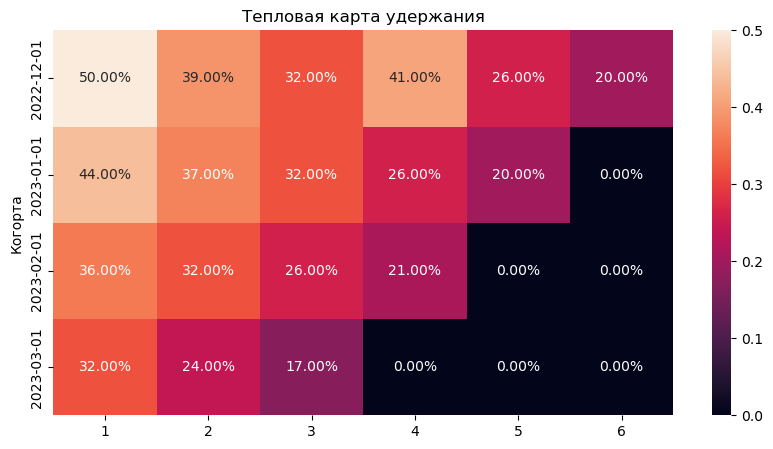

In [9]:
# строим хитмэп без нулевого лайфтайма

plt.figure(figsize=(10, 5)) 
sns.heatmap(
    retention_share.drop(0, axis=1),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания')
plt.show()

In [10]:
# с помощью атрибута T: столбцы становятся строками, а строки - столбцами

retention_line = retention_share.T.round(2)
retention_line

Когорта,2022-12-01,2023-01-01,2023-02-01,2023-03-01
0,1.00,1.00,1.00,1.00
1,0.50,0.44,0.36,0.32
2,0.39,0.37,0.32,0.24
3,0.32,0.32,0.26,0.17
4,0.41,0.26,0.21,0.00
5,0.26,0.20,0.00,0.00
6,0.20,0.00,0.00,0.00


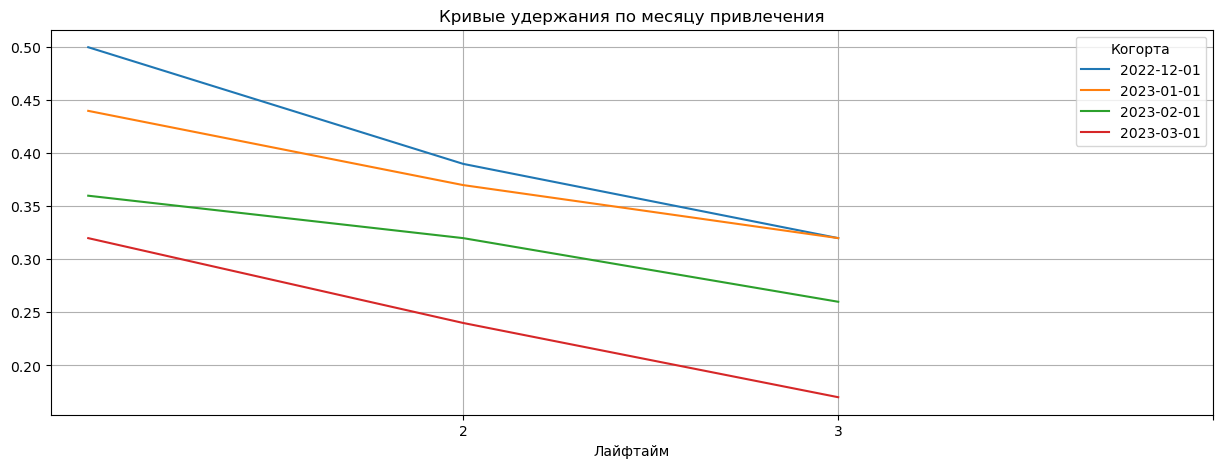

In [11]:
# строим кривые удержания на 2,3,4 месяцы

report = retention_share.drop([0,4,5,6], axis=1)

report.T.plot(
    grid=True,  # добавляем сетку
    xticks=list(report.columns.values),  # отметки на оси X — названия колонок
    figsize=(15, 5),  # размер графика
)
plt.xlabel('Лайфтайм')  # название оси X
plt.title('Кривые удержания по месяцу привлечения')  # название графика
plt.show()

<div style="border:solid green 2px; padding: 20px">

Самое низкое удержание клиентов в когорте март2023, март был последний месяц действия акции.

В когорте дек2022 самый высокий показатель удержания, но и самое низкое значение по количеству клиентов.

</div>

[В начало](#начало)

<a id="коэффициент_отскока"></a>

## Churn Rate (Коэффициент «отскока»)

<div style="border:solid black 2px; padding: 20px">

Строим тепловую карту для коэффициента «отскока».

</div>

In [12]:
retention

,Размер когорты,0,1,2,3,4,5,6
Когорта,,,,,,,,
2022-12-01,76,76.0,38.0,30.0,24.0,31.0,20.0,15.0
2023-01-01,313,313.0,137.0,116.0,101.0,82.0,64.0,0.0
2023-02-01,266,266.0,96.0,84.0,70.0,56.0,0.0,0.0
2023-03-01,274,274.0,89.0,67.0,47.0,0.0,0.0,0.0


In [13]:
churn = (1-(retention / retention.shift(axis=1)))\
        .drop(columns=['Размер когорты', 0]).fillna(0).round(2)

churn = churn.replace(1,0)
churn

,1,2,3,4,5,6
Когорта,,,,,,
2022-12-01,0.50,0.21,0.20,-0.29,0.35,0.25
2023-01-01,0.56,0.15,0.13,0.19,0.22,0.00
2023-02-01,0.64,0.12,0.17,0.20,0.00,0.00
2023-03-01,0.68,0.25,0.30,0.00,0.00,0.00


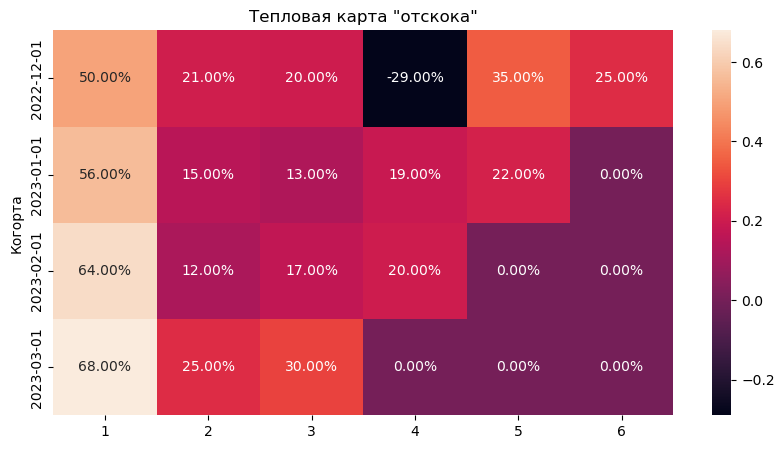

In [14]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    churn, 
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта "отскока"') 
plt.show()

<div style="border:solid green 2px; padding: 20px">

Самый высокий коэффициент «отскока» на второй месяц покупки.

У когорты дек2022 коэффициент «отскока» на 5й месяц отрицательный, т.е. клиенты вернулись, предположительно, могла быть сделана некая рассылка по данной базе клиентов.

</div>

[В начало](#начало)

<a id="Частота_транзакций"></a>

## АРС (Частота транзакций)

<div style="border:solid black 2px; padding: 20px">

Рассчитаем частоту операций клиентами по месяцам.

</div>

In [15]:
final['Частота транзакций в рамках акции'] = round(final['Транзакции в рамках акции']
                                            /final['Клиенты - участники акции в данном месяце'], 1)

final['Частота транзакций по участникам программы'] = round(final['Количество операций по участникам программы']
                                                    /final['Количество уникальных клиентов-участников программы'], 1)

final['Частота транзакций Держатели карты'] = round(final['Количество операций']
                                            /final['Держатели карты - не участники программы, кол-во карт'], 1)

final[['Месяц транзакции', 'Частота транзакций в рамках акции',
       'Частота транзакций по участникам программы', 'Частота транзакций Держатели карты']]\
       .fillna(' ')

,Месяц транзакции,Частота транзакций в рамках акции,Частота транзакций по участникам программы,Частота транзакций Держатели карты
0,2022-12-01,1.0,0.4,
1,2023-01-01,1.3,0.6,1.4
2,2023-02-01,1.3,0.7,1.4
3,2023-03-01,1.3,0.7,1.4
4,2023-04-01,,0.5,1.4
5,2023-05-01,,0.4,1.4
6,2023-06-01,,0.3,1.3


In [16]:
cohort['Частота транзакций'] = round(cohort['Количество операций'] / cohort['Количество клиентов'], 1)

In [17]:
apc = cohort.pivot_table(index=['Когорта'], columns='Лайфтайм', values='Частота транзакций').fillna(0)
apc

Лайфтайм,0,1,2,3,4,5,6
Когорта,,,,,,,
2022-12-01,1.2,1.8,2.1,2.5,1.6,1.6,1.3
2023-01-01,2.0,2.0,2.3,2.1,1.8,1.8,0.0
2023-02-01,1.7,1.8,1.9,1.7,1.5,0.0,0.0
2023-03-01,1.9,1.9,1.7,1.6,0.0,0.0,0.0


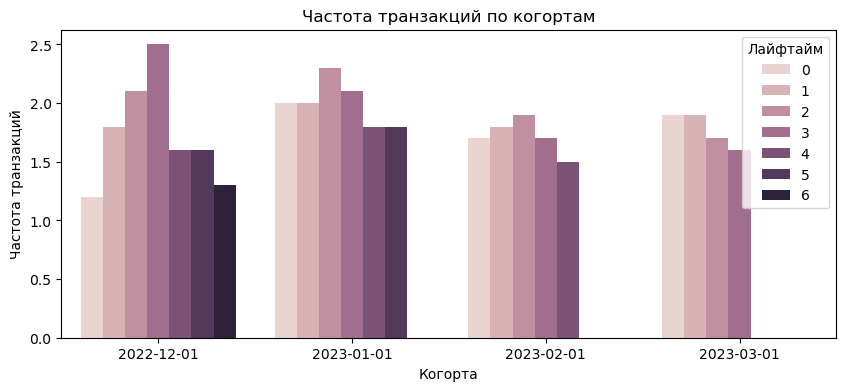

In [18]:
plt.figure(figsize=(10, 4))
sns.barplot(data=cohort, x='Когорта', y='Частота транзакций', hue='Лайфтайм')
plt.title('Частота транзакций по когортам')
plt.show()

<div style="border:solid green 2px; padding: 20px">

Частота транзакций в рамках акции выше частоты транзакций участников программы.

После завершения акции видим падающий тренд по частоте транзакций среди участников программы.

Стабильно высокая частота транзакций у когорты янв2023.

</div>

[В начало](#начало)

<a id="средний"></a>

## Средний чек

<div style="border:solid black 2px; padding: 20px">

Выведем средний чек по когортам и средний чек в рамках акции.

</div>

In [19]:
final['Средний чек по участникам программы'] = round(final['Сумма операций по участникам программы']
                                               /final['Количество операций по участникам программы'], 0)

final['Средний чек в рамках акции'] = round(final['Оборот в рамках акции']
                                      /final['Транзакции в рамках акции'], 0)

final['Средний чек в акцию vs к участникам программы'] = round((final['Средний чек в рамках акции']
                                                         /final['Средний чек по участникам программы']) - 1, 2)

final[['Месяц транзакции', 'Средний чек по участникам программы',
       'Средний чек в рамках акции', 'Средний чек в акцию vs к участникам программы']]\
       .fillna(0)

,Месяц транзакции,Средний чек по участникам программы,Средний чек в рамках акции,Средний чек в акцию vs к участникам программы
0,2022-12-01,1816.0,1966.0,0.08
1,2023-01-01,1313.0,1882.0,0.43
2,2023-02-01,1372.0,2078.0,0.51
3,2023-03-01,1293.0,2144.0,0.66
4,2023-04-01,929.0,0.0,0.00
5,2023-05-01,877.0,0.0,0.00
6,2023-06-01,988.0,0.0,0.00


In [20]:
cohort['Средний чек'] = round(cohort['Оборот'] / cohort['Количество операций'], 0)
avg = cohort.pivot_table(index=['Когорта'], columns='Лайфтайм', values='Средний чек').fillna(0)
avg

Лайфтайм,0,1,2,3,4,5,6
Когорта,,,,,,,
2022-12-01,1816.0,890.0,1006.0,986.0,734.0,725.0,949.0
2023-01-01,1360.0,1342.0,1083.0,1148.0,993.0,999.0,0.0
2023-02-01,1439.0,1080.0,788.0,811.0,995.0,0.0,0.0
2023-03-01,1509.0,837.0,836.0,972.0,0.0,0.0,0.0


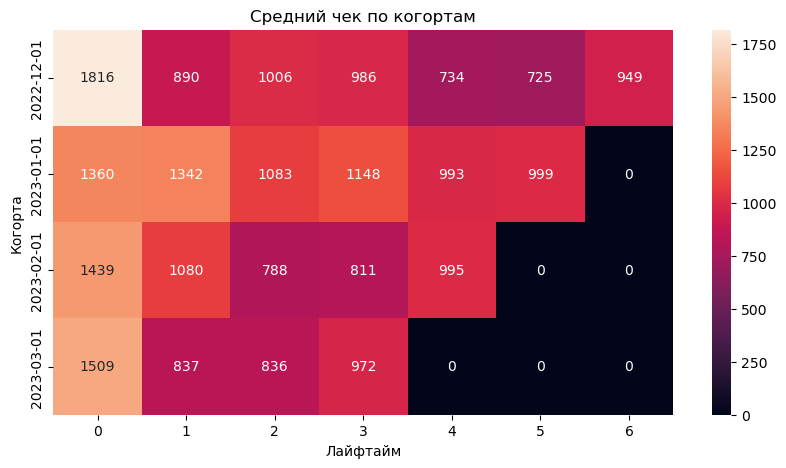

In [21]:
plt.figure(figsize=(10, 5)) 
sns.heatmap(
    avg, 
    annot=True,
    fmt='g'
)
plt.title('Средний чек по когортам') 
plt.show()

In [22]:
# стандартное отклонение среднего чека по когортам

avg2 = avg.replace(0, np.NaN)
avg2['std'] = avg2.std(ddof=0, axis=1).round(0)
avg2['std']

Когорта
2022-12-01    343.0
2023-01-01    149.0
2023-02-01    235.0
2023-03-01    277.0
Name: std, dtype: float64

<div style="border:solid green 2px; padding: 20px">

Средний чек в рамках акции был выше среднего чека по участникам программы в период акции в 1,5 раза (без учета декабря 2022, когда разница была незначительная).

Средний чек в рамках акции был выше среднего чека по участникам программы после акции в 2 раза.

В когорте янв2023 наименьшее отклонение значений среднего чека от центрального значения.

Данная акция увеличивает средний чек.

<div>

[В начало](#начало)

<a id="доход"></a>

## Доход с одного клиента

<div style="border:solid black 2px; padding: 20px">

Рассчитаем доход с одного клиента.

</div>

In [23]:
final['Доход с одного клиента в рамках акции'] = round(final['Оборот в рамках акции']
                                                 /final['Клиенты - участники акции в данном месяце'], 0)
rows = [0,1,2,3]
cols = ['Месяц транзакции', 'Доход с одного клиента в рамках акции']
final.loc[final.index[rows], cols]

,Месяц транзакции,Доход с одного клиента в рамках акции
0,2022-12-01,2043.0
1,2023-01-01,2366.0
2,2023-02-01,2651.0
3,2023-03-01,2739.0


In [24]:
cohort['Доход с одного клиента'] = round(cohort['Оборот'] / cohort['Количество клиентов'], 0)

rev_per_user = cohort.pivot_table(index=['Когорта'], columns='Лайфтайм', values='Доход с одного клиента')\
                     .fillna(0)
rev_per_user

Лайфтайм,0,1,2,3,4,5,6
Когорта,,,,,,,
2022-12-01,2103.0,1615.0,2113.0,2466.0,1160.0,1197.0,1202.0
2023-01-01,2690.0,2704.0,2455.0,2421.0,1828.0,1765.0,0.0
2023-02-01,2500.0,1912.0,1463.0,1344.0,1528.0,0.0,0.0
2023-03-01,2799.0,1562.0,1447.0,1509.0,0.0,0.0,0.0


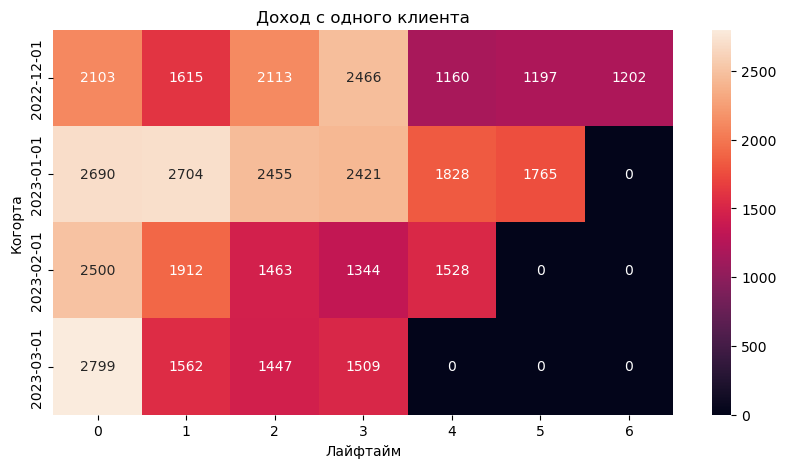

In [25]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    rev_per_user, 
    annot=True,
    fmt='g'
)
plt.title('Доход с одного клиента')
plt.show()

<div style="border:solid green 2px; padding: 20px">

Доход с одного клиента в акцию вырос. В пункте ниже мы видели, что вырос средний чек в период акции.

Самый высокий доход с одного клиента в рамках акции мы наблюдаем в марте.

В когорте янв2023 стабильно высокий доход с одного клиента по месяцам.

</div>

[В начало](#начало)

<a id="оборот"></a>

## Оборот по месяцам

<div style="border:solid black 2px; padding: 20px">

Выведем данные по обороту.

</div>

In [26]:
rev = cohort.pivot_table(index=['Когорта'], columns='Лайфтайм', values='Оборот').fillna(0).round(0)
rev['Итого'] = rev.sum(axis=1)
rev

Лайфтайм,0,1,2,3,4,5,6,Итого
Когорта,,,,,,,,
2022-12-01,159798.0,61381.0,63382.0,59185.0,35948.0,23941.0,18030.0,421665.0
2023-01-01,842107.0,370420.0,284733.0,244540.0,149931.0,112942.0,0.0,2004673.0
2023-02-01,665022.0,183564.0,122861.0,94067.0,85583.0,0.0,0.0,1151097.0
2023-03-01,766816.0,139025.0,96943.0,70938.0,0.0,0.0,0.0,1073722.0


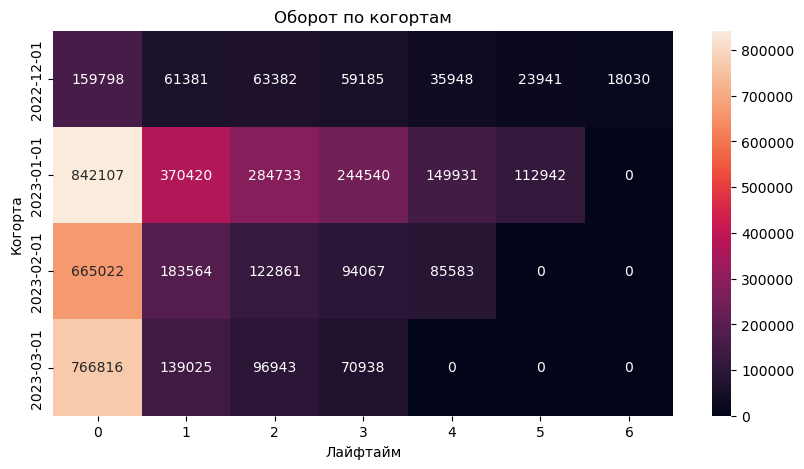

In [27]:
plt.figure(figsize=(10, 5)) 
sns.heatmap(
    rev.drop('Итого', axis=1),  # удаляем лишние столбцы
    annot=True,
    fmt='g'
)
plt.title('Оборот по когортам') 
plt.show()

In [28]:
rev_total = final[['Месяц транзакции', 'Сумма операций по участникам программы']]
rev_total

,Месяц транзакции,Сумма операций по участникам программы
0,2022-12-01,159798.17
1,2023-01-01,903487.51
2,2023-02-01,1098824.29
3,2023-03-01,1294297.42
4,2023-04-01,542373.67
5,2023-05-01,364880.71
6,2023-06-01,287492.29


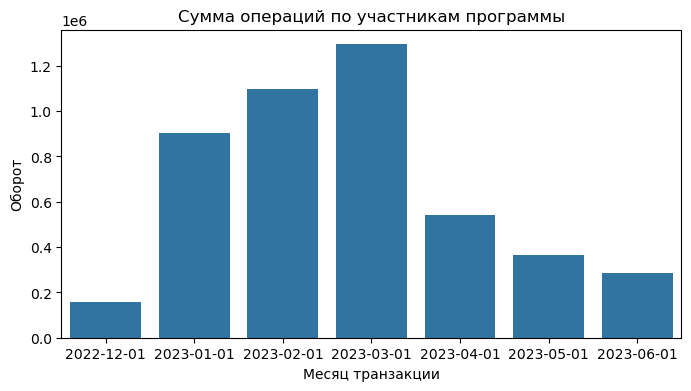

In [29]:
plt.figure(figsize=(8, 4))
fig = sns.barplot(x = 'Месяц транзакции', y = 'Сумма операций по участникам программы', data = rev_total)

plt.xlabel('Месяц транзакции')
plt.ylabel('Оборот')
plt.title('Сумма операций по участникам программы')

plt.show()

<div style="border:solid green 2px; padding: 20px">

В марте 2023 самый высокий оборот по участникам программы.

У когорты янв2023 самый высокий суммарный оборот, а также самый высокий оборот в разрезе лайфайма.

</div>

[В начало](#начало)

<a id="Соотношение"></a>

## Соотношение доходов и расходов

<div style="border:solid black 2px; padding: 20px">

Расходы (предполагаемые):
* Кэшбэк 3%.
* Зададим предполагаемую комиссию 3%.

Рассмотрим соотношение доходов и расходов.

</div>

In [30]:
cashback = 0.03
commission = 0.03 # предполагаемая комиссия
cash_comm = cashback + commission

In [31]:
final['Итог'] = 'Итог'
total = final.pivot_table(index='Итог',
                          values=['Сумма операций по участникам программы', 'Оборот в рамках акции'],
                          aggfunc='sum').round()

total['Расходы'] = round(total['Оборот в рамках акции'] * cash_comm, 0)

total['Доля расходов от суммарного оборота'] = round(total['Расходы']
                                                     /total['Сумма операций по участникам программы'], 2)
total.style.format('{:,}')

,Оборот в рамках акции,Сумма операций по участникам программы,Расходы,Доля расходов от суммарного оборота
Итог,,,,
Итог,"2,977,249.0","4,651,154.0","178,635.0",0.04


<div style="border:solid green 2px; padding: 20px">

Доходы программы лояльности значительно превысили расходы (предполагаемые расходы).

</div>

[В начало](#начало)

<a id="Выводы"></a>

## Выводы

<div style="border:solid green 2px; padding: 20px">

**Выводы по итогам акции "3% кэшбэк на сумму от 999 рублей". Период акции 01.12.2022-31.03.2023 г.**

Акцию можно считать успешной.

* Доходы значительно превысили расходы. Доля расходов от суммарного оборота 4%.

* В акцию выросли показатели среднего чека и частота транзакций.
    * Средний чек в рамках акции был выше среднего чека по участникам программы в период акции в 1,5 раза (без учета декабря 2022, когда разница была незначительная). Средний чек в рамках акции был выше среднего чека по участникам программы после акции в 2 раза.
    * После завершения акции видим падающий тренд по частоте транзакций среди участников программы.

* Обратить внимание на когорту янв2023, показала лучшие результаты по большинству метрик, вероятно стоит разработать персональные предложения для участников данной когорты. А также более детально изучить данную когорту, чтобы выявить факторы успеха и применить данные знания при запуске следующих акций.

* Слабые показатели у когорты дек2022, низкое число участников, это была первая когорты данной акции, возможно недостаточно освещалась акция вначале. Проверить этот момент и учесть в будущем при запуске акции.

</div>